<a href="https://colab.research.google.com/github/bbash/List-of-Hausa-Stop-Word/blob/main/List_of_Hausa_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# loading datasets datasets from different domains: news domain and tweet from X.

# NEWS DOMAIN
bbc_df = pd.read_csv('bbchausa.csv')
voa_df = pd.read_csv('voahausa.csv')
aminiya_df = pd.read_csv('aminiya.csv')
leadership_df = pd.read_csv('hausaleadership.csv')

# from X: tweet
tweet_df = pd.read_csv('train.csv', encoding='latin1')

In [7]:
# print the first 5 entries of one of the dataset
print(bbc_df.head())

        Date                                           Articles
0  1/15/2024  Manajar darakta a IMF, Kristalina Georgieva ta...
1  1/21/2024  Shagon da ke tsakiyar ƙauyen yana samar da kay...
2  1/21/2024  Hakan ya biyo bayan kashe daya daga cikin ‘yan...
3  1/21/2024  Manoma da dama daga jihar Kano, sun ce sun zub...
4  1/21/2024  Fashewar wani abu ya janyo ruɗani a IbadanDa m...


In [9]:
bbc_text = bbc_df['Articles']
voa_text = voa_df['Articles']
aminiya_text = aminiya_df['Articles']
leadership_text = leadership_df['Articles']

tweet_text = tweet_df['tweet']

In [10]:
print('BBC: ', len(bbc_text))
print('VOA: ', len(voa_text))
print('AMINIYYA: ', len(aminiya_text))
print('LEADERSHIP: ', len(leadership_text))

print('Tweets: ', len(tweet_text))

BBC:  752
VOA:  544
AMINIYYA:  2081
LEADERSHIP:  1124
Tweets:  14172


In [11]:
BBC_uniques_article = set(bbc_text)
VOA_uniques_article = set(voa_text)
AMINIYA_uniques_article = set(aminiya_text)
LEADER_uniques_article = set(leadership_text)

tweet_uniques_article = set(tweet_text)

In [12]:
print('UNIQUE BBC: ', len(BBC_uniques_article))
print('UNIQUE VOA: ', len(VOA_uniques_article))
print('UNIQUE AMINIYYA: ', len(AMINIYA_uniques_article))
print('UNIQUE LEADERSHIP: ', len(LEADER_uniques_article))

print('UNIQUE tweets: ', len(tweet_uniques_article))

UNIQUE BBC:  752
UNIQUE VOA:  450
UNIQUE AMINIYYA:  1743
UNIQUE LEADERSHIP:  1086
UNIQUE tweets:  14172


In [13]:
# COUNT NUMBER OF SENTENCES
print('Number of sentence in BBC: ', len(str(BBC_uniques_article).split('.')))
print('Number of sentence in VOA: ',len(str(VOA_uniques_article).split('.')))
print('Number of sentence in AMINIYA: ',len(str(AMINIYA_uniques_article).split('.')))
print('Number of sentence in LEADERSHIP: ',len(str(LEADER_uniques_article).split('.')))

print('Number of sentence in Tweet: ',len(str(tweet_uniques_article).split('.')))

Number of sentence in BBC:  16833
Number of sentence in VOA:  3081
Number of sentence in AMINIYA:  18092
Number of sentence in LEADERSHIP:  9649
Number of sentence in Tweet:  8185


In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# COUNT NUMBER OF WORDS
BBC_words = [word.lower() for word in word_tokenize(str(BBC_uniques_article)) if word.isalpha()]
VOA_words = [word.lower() for word in word_tokenize(str(VOA_uniques_article)) if word.isalpha()]
AMINIYA_words = [word.lower() for word in word_tokenize(str(AMINIYA_uniques_article)) if word.isalpha()]
LEADERSHIP_words = [word.lower() for word in word_tokenize(str(LEADER_uniques_article)) if word.isalpha()]
Tweet_words = [word.lower() for word in word_tokenize(str(tweet_uniques_article)) if word.isalpha()]

In [17]:
print('UNIQUE BBC: ', len(BBC_words))
print('UNIQUE VOA: ', len(VOA_words))
print('UNIQUE AMINIYYA: ', len(AMINIYA_words))
print('UNIQUE LEADERSHIP: ', len(LEADERSHIP_words))
print('UNIQUE Tweet: ', len(Tweet_words))

UNIQUE BBC:  400752
UNIQUE VOA:  89985
UNIQUE AMINIYYA:  431737
UNIQUE LEADERSHIP:  280348
UNIQUE Tweet:  162451


In [18]:
# COMBINE THE news DATAS DATAFRAME INTO ONE
merged_words = BBC_words + VOA_words + AMINIYA_words + LEADERSHIP_words
print('Total unique words',len(set(merged_words)))
print('Total words', len(merged_words))

Total unique words 28044
Total words 1202822


In [20]:
# save the merged word in csv file format
news = pd.DataFrame({'Words': merged_words})
tweets = pd.DataFrame({'Words': Tweet_words})



# Save the DataFrame to a CSV file
news.to_csv('news.csv', index=False)
tweets.to_csv('tweet.csv', index=False)


print("CSV file 'datasets.csv' has been saved successfully.")
#words_df = pd.read_csv('datasets.csv').dropna(axis=0)
#words_df.isna().sum()

CSV file 'datasets.csv' has been saved successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word counts for TWEETS:
  Threshold: 0.000001, Word Count: 19241
  Threshold: 0.000010, Word Count: 7792
  Threshold: 0.000100, Word Count: 1197
  Threshold: 0.001000, Word Count: 135
  Threshold: 0.010000, Word Count: 4
  Threshold: 0.100000, Word Count: 0
  Threshold: 1.000000, Word Count: 0


Word counts for NEWS:
  Threshold: 0.000001, Word Count: 15352
  Threshold: 0.000010, Word Count: 4924
  Threshold: 0.000100, Word Count: 1124
  Threshold: 0.001000, Word Count: 136
  Threshold: 0.010000, Word Count: 8
  Threshold: 0.100000, Word Count: 0
  Threshold: 1.000000, Word Count: 0




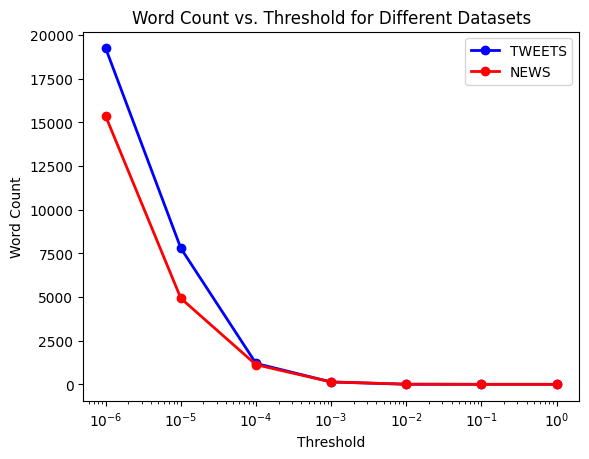

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
import pickle
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# Load datasets
tweets = pd.read_csv('tweet.csv')
news = pd.read_csv('news.csv')

tweet_words_at_threshold = []
news_words_at_threshold = []

# Extract text columns
tweets = tweets['Words']
news = news['Words']


# Define datasets, names, and colors
datasets = [tweets, news]
dataset_names = ['TWEETS', 'NEWS']
colors = ['blue', 'red']

# Define thresholds
thresholds = [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02, 1.0E-01, 1.0E+00]

# Iterate through datasets
for i, dataset in enumerate(datasets):
    tfidf_vectorizer = TfidfVectorizer()
    word_tfidf_scores = defaultdict(float)
    num_batches = 0

    # Initialize word_counts here, inside the dataset loop
    word_counts = []

    # Process dataset in batches (adjust chunk_size if needed)
    chunk_size = 500
    for chunk_start in range(0, len(dataset), chunk_size):
        chunk_end = min(chunk_start + chunk_size, len(dataset))
        chunk_texts = dataset[chunk_start:chunk_end].dropna(axis=0).tolist()

        num_batches += 1
        tfidf_matrix = tfidf_vectorizer.fit_transform(chunk_texts)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
        word_tfidf_means = tfidf_df.mean(axis=0)
        for word, score in word_tfidf_means.items():
            word_tfidf_scores[word] += score

    # Normalize scores
    for word, score in word_tfidf_scores.items():
        word_tfidf_scores[word] /= num_batches

    # Iterate through thresholds and print word counts
    print(f"Word counts for {dataset_names[i]}:")
    for threshold in thresholds:
        filtered_words = {word: score for word, score in word_tfidf_scores.items() if score >= threshold}
        word_count = len(filtered_words)
        print(f"  Threshold: {threshold:.6f}, Word Count: {word_count}")
        word_counts.append(word_count)  # Append word_count to the list
        if threshold == 0.001:
            if dataset_names[i] == 'TWEETS':
                tweet_words_at_threshold = list(filtered_words.keys())
            elif dataset_names[i] == 'NEWS':
                news_words_at_threshold = list(filtered_words.keys())
    print("\n")  # Add a newline for better readability

    # Plot word counts for the current dataset
    plt.plot(thresholds, word_counts, marker='o', label=dataset_names[i], color=colors[i], linewidth=2)  # Increased linewidth for spacing
# Save the lists
with open('tweet_words_0001.pkl', 'wb') as f:
    pickle.dump(tweet_words_at_threshold, f)

with open('news_words_0001.pkl', 'wb') as f:
    pickle.dump(news_words_at_threshold, f)

# Set plot properties
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Word Count')
plt.title('Word Count vs. Threshold for Different Datasets')
plt.legend()

plt.show()

plt.savefig('selected_words.png', bbox_inches='tight', pad_inches=0)

In [24]:
with open('tweet_words_0001.pkl', 'rb') as f:
    tweet_words = pickle.load(f)

with open('news_words_0001.pkl', 'rb') as f:
    news_words = pickle.load(f)


In [27]:
tweet_words_set = set(tweet_words)
news_words_set = set(news_words)

# Find the intersection
intersection_words = tweet_words_set.intersection(news_words_set)
print(len(intersection_words))

# Print the intersection
print("Intersection words:", intersection_words)


77
Intersection words: {'aka', 'daga', 'abin', 'masu', 'ya', 'mutane', 'ko', 'kara', 'har', 'fara', 'dan', 'ga', 'irin', 'shi', 'wa', 'zai', 'ce', 'saboda', 'suna', 'cewa', 'cikin', 'in', 'kai', 'mata', 'dai', 'ke', 'kashe', 'ka', 'yana', 'ne', 'na', 'domin', 'yadda', 'hakan', 'mai', 'ta', 'mu', 'ba', 'dama', 'ma', 'don', 'akwai', 'idan', 'yanzu', 'bai', 'wannan', 'suke', 'ake', 'duniya', 'kasa', 'amma', 'yake', 'wanda', 'haka', 'suka', 'yan', 'ana', 'kasar', 'sa', 'za', 'duk', 'kuma', 'daya', 'wata', 'yi', 'kamar', 'iya', 'an', 'sai', 'su', 'samu', 'gaba', 'ita', 'baya', 'da', 'wani', 'sun'}


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 4.7 MB/s eta 0:00:00


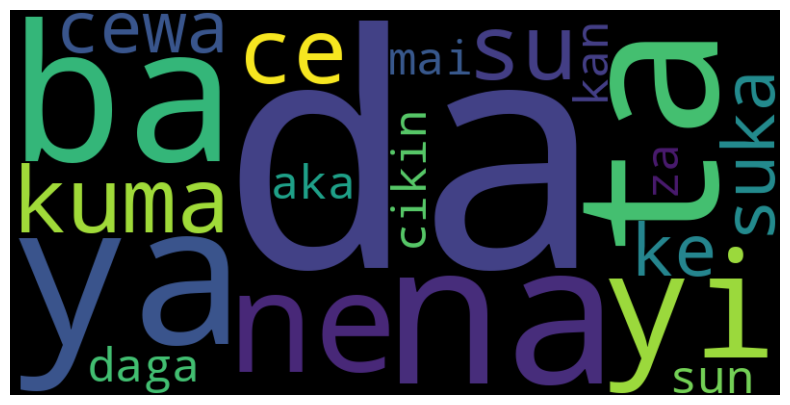

In [ ]:
# wordcloud
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Join the words into a single string
text = ' '.join(top_20_tf_result)

# Generate a word cloud without collocations
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud as an image
plt.savefig('wordcloud_image.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


In [ ]:
top_100_tf_result = []
for word, score in sorted_words[:100]:
    top_100_tf_result.append(word)
    print(f"{word}: {score:.3f}")

da: 0.087
ya: 0.028
ta: 0.025
na: 0.018
ba: 0.012
yi: 0.012
ne: 0.011
kuma: 0.010
su: 0.009
ce: 0.009
ke: 0.008
suka: 0.007
cewa: 0.007
daga: 0.006
za: 0.006
kan: 0.006
mai: 0.006
sun: 0.006
cikin: 0.006
aka: 0.006
ga: 0.006
wa: 0.005
shi: 0.005
wannan: 0.004
wani: 0.004
an: 0.004
yan: 0.004
wanda: 0.004
ake: 0.004
masu: 0.004
bayan: 0.003
wasu: 0.003
kai: 0.003
jihar: 0.003
zuwa: 0.003
dai: 0.003
domin: 0.003
inda: 0.003
sai: 0.003
ranar: 0.003
zai: 0.003
kasar: 0.003
ko: 0.003
ci: 0.003
yadda: 0.003
ma: 0.003
bayyana: 0.003
iya: 0.003
samu: 0.003
wajen: 0.002
wata: 0.002
sa: 0.002
gaba: 0.002
hukumar: 0.002
lokacin: 0.002
tare: 0.002
in: 0.002
naira: 0.002
suna: 0.002
watan: 0.002
amma: 0.002
don: 0.002
haka: 0.002
yanzu: 0.002
kasa: 0.002
abin: 0.002
har: 0.002
duk: 0.002
shugaban: 0.002
najeriya: 0.002
ji: 0.002
biyu: 0.002
yin: 0.002
mutane: 0.002
mu: 0.002
samun: 0.002
yana: 0.002
suke: 0.002
idan: 0.002
saboda: 0.002
hakan: 0.002
yayin: 0.002
shekara: 0.002
bai: 0.002
yake: 0.00

In [ ]:
# save the merged word in csv file format
df = pd.DataFrame({'Words': list(set(top_100_tf_result))})

# Save the DataFrame to a CSV file
df.to_csv('final_stop_words.csv', index=False)

print("CSV file 'final_stop_words.csv' has been saved successfully.")

CSV file 'final_stop_words.csv' has been saved successfully.


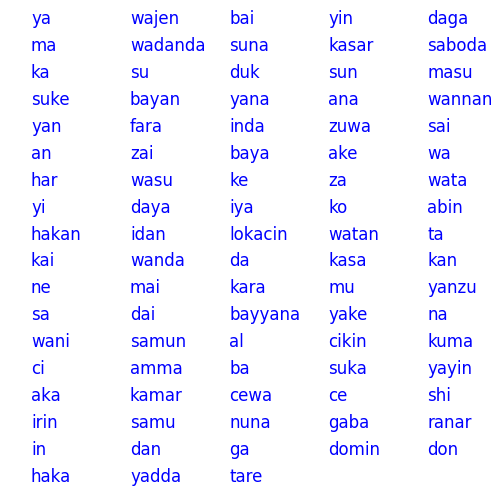

In [ ]:
import matplotlib.pyplot as plt

# Determine the number of words and adjust subplot grid accordingly
predicted_df = pd.read_csv('final_stop_words.csv')
num_words = len(list(predicted_df['Words']))
num_rows = (num_words - 1) // 5 + 1  # Calculate the number of rows needed based on 5 columns
num_cols = min(num_words, 5)  # Maximum 5 columns

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))

# Plot each word
for i, word in enumerate(list(predicted_df['Words'])):
    ax = axes[i // num_cols, i % num_cols]  # Calculate the position of the subplot
    ax.text(0.5, 0.5, word, fontsize=12, ha='left', color='b')  # Display the word in the center of the subplot
    ax.axis('off')  # Turn off the axis

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
# Save the word cloud as an image
plt.savefig('selected_words.png', bbox_inches='tight', pad_inches=0)
plt.show()
